# Solicitudes HTTP con Requests

En la anterior clase vimos el flujo de trabajo en un proyecto. 

En esta veremos como realizar peticiones a servidores web con una librería llamada "[Requests](https://requests.readthedocs.io/en/latest/)".

Desde Python podemos conectarnos a servidores y hacer peticiones, lo vamos a llevar a cabo con la anterior librería y vamos a utilizar la página [Platzi Fake Store API](https://fakeapi.platzi.com/)


## Platzi Fake Store API
Es un sitio destinado a conocer una API de forma profesional. En este sitio podemos obtener una lista de productos, categorías, usuarios. Podemos leer la [documentación](https://fakeapi.platzi.com/en/about/introduction/)

Vamos a hacer un request desde Python a este recurso.Pero primero instalemos la librería, podemos usar cualquiera de los 3 comandos:
```bash
conda install conda-forge::requests
conda install requests
mamba install requests
```

Una vez que se ha instalado, vamos a explorar la web y podemos consultar [la sección de productos](https://api.escuelajs.co/api/v1/products), si nos aparece de esta forma:

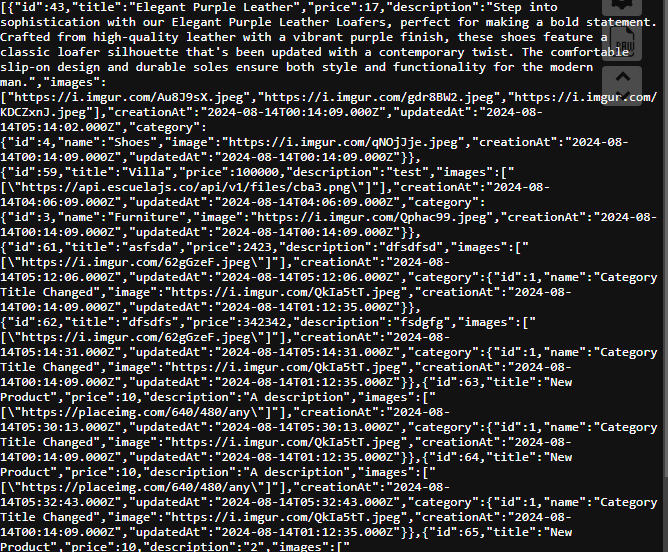

Podemos instalar una extensión de chrome llamada [JSON Viewer](https://chromewebstore.google.com/detail/json-viewer/gbmdgpbipfallnflgajpaliibnhdgobh?hl=es), que nos ayudará a visualizar los datos de manera mucho más amena:

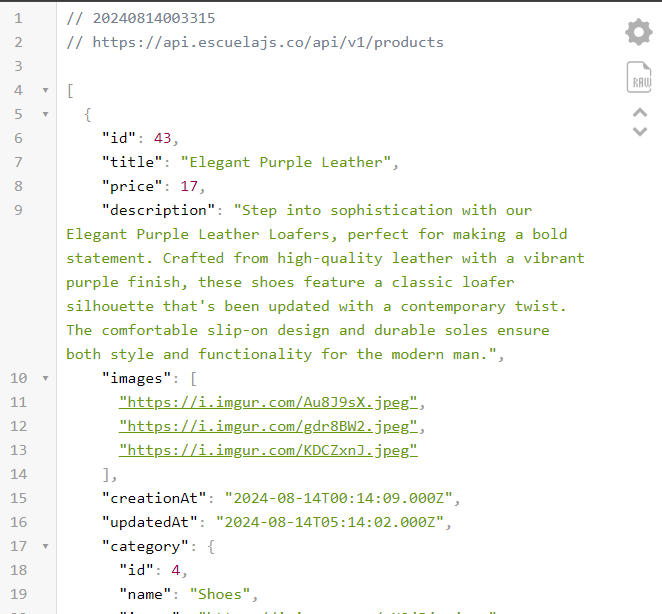



## Explorando la página

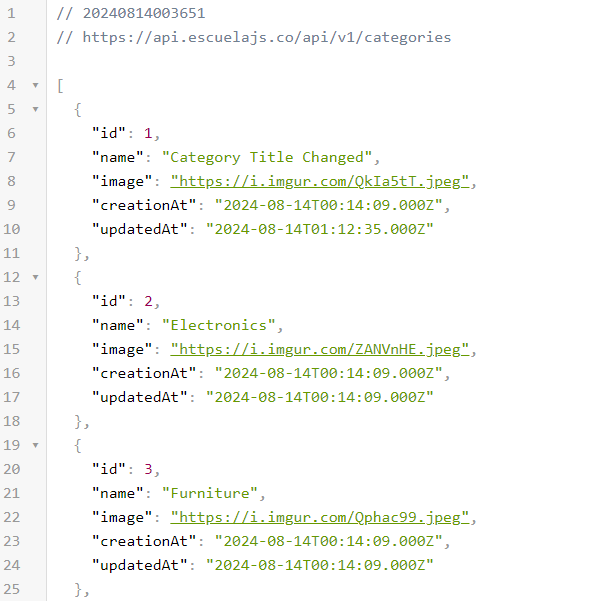

Podemos consumir los datos directamente del enlace: https://api.escuelajs.co/api/v1/categories, además si vemos el formato de los datos; vemos que tiene un formato de lista con diccionarios dentro de ella, y esto pertenece a un comercio en linea.

Ahora para comenzar a trabajar vamos a crear otro proyecto llamado "[web-server](py-project/web-server/)" y dentro de el un entorno nuevo. Así que debemos correr las siguientes lineas

```bash
#crear directorio de proyecto
mkdir web-server
#observar en donde está python3
which python3
#desactivar el entorno
deactivate
#desactivar el entorno de conda
conda deactivate
#entrar a directorio web-server
cd web-server
#crear entorno 
python3 -m venv env
#activar entorno
source env/bin/activate
#verificar que ya estamos en el ambiente virtual 
which python3
```
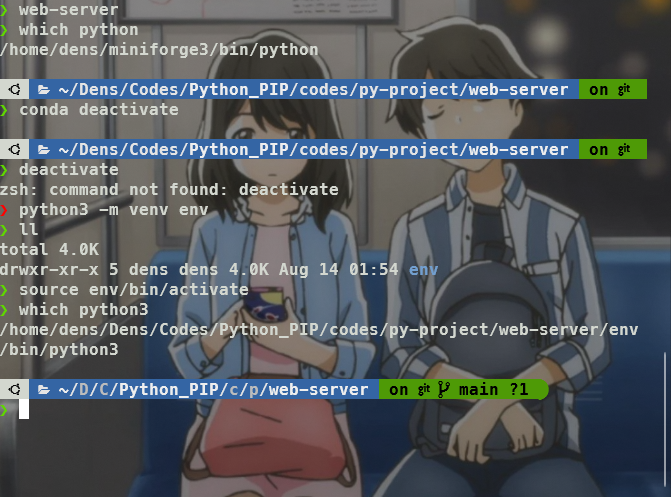

Es importante que te fijes antes en que ambiente estas, para poder seguir instalando las librerías.

Procedemos a instalar las librerías:

```bash
#Instalar biblioteca
pip3 install requests
#verificar librerías 
pip3 freeze
```
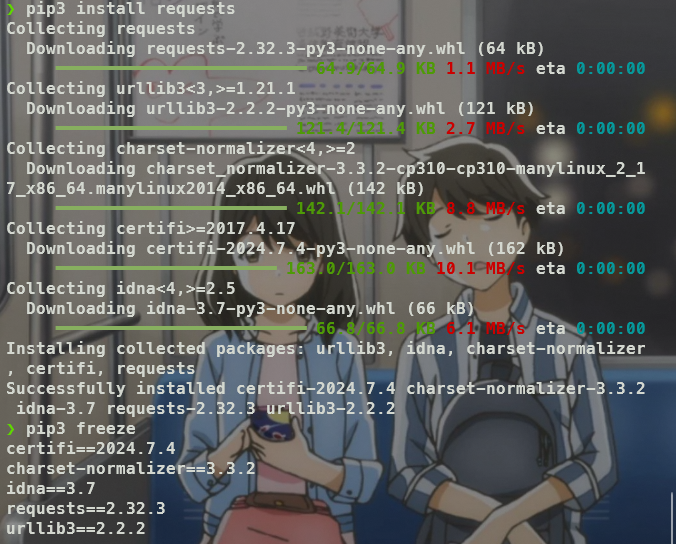

Como este es un nuevo entorno, vamos a crear un archivo **[requirements.txt](py-project/web-server/requirements.txt)**:

```bash
#crearlo
pip3 freeze > requirements.txt
#Leerlo
cat requirements.txt
```
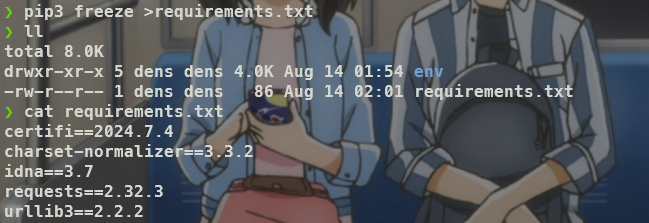

Lo siguiente es crear un archivo en python llamado **[store.py](py-project/web-server/store.py)** y procedemos a editarlo.

Una vez que hemos terminado de editarlo:

```python
import requests
def get_categories():
    r = requests.get('https://api.escuelajs.co/api/v1/categories')
    #estado
    print(r.status_code)
    #saber la respuesta
    print(r.text)
```

Creamos un nuevo archivo llamado [main.py](py-project/web-server/main.py) con el siguiente código:

```python
import store

def run():
    store.get_categories()

#Para correrlo como script
if __name__ == "__main__":
    run()  # run() es la función que se ejecuta cuando se corre el script
```

## Correr desde terminal
Una vez terminamos de crear los archivos procedemos a posicionarnos en web-server y correr los siguientes comandos:

```bash
#saber la ubicación en la que estoy
pwd
#cambiar de directorio a web-server
#Si ya estas en web-server omite el comando siguiente
cd web-server
python3 main.py
```

Ejecutemos

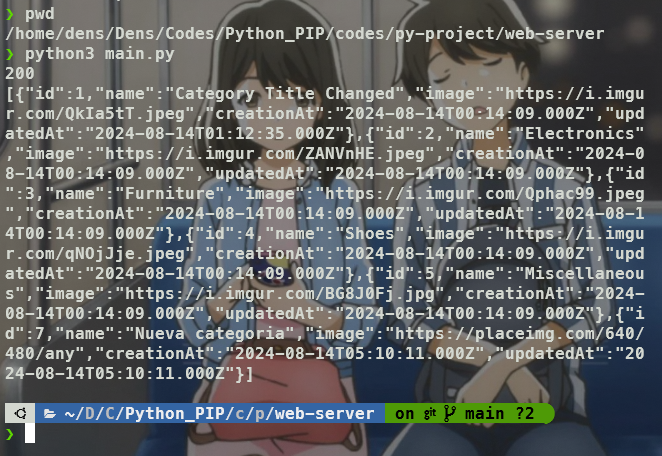

El numero `200` indica que todo está bien, y que hemos recibido la información del server, pero modifiquemos un poco el código de [store.py](py-project/web-server/store.py) para ver algunos datos adicionales. Añadimos solo una linea de código:

```python
    #saber la respuesta
    print(r.text)
    print(type(r.text)) #Esta linea
```

Volvamos a correr el código desde la terminal y ver que despliega

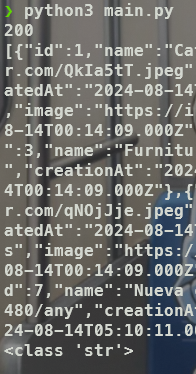

Al final me dice que es un tipo string. Y dado este formato no podemos realizar operaciones para consultar información, así que procederemos a transformarlo con la librería **requests**.

### Transformación de datos obtenidos

Vamos a añadir este código a [store.py](py-project/web-server/store.py) para que python lo pueda reconocer como un formato con el que trabaja:

```python
    #lo convierte a JSON
    categories = r.json()
    for category in categories:
        print(category['name'])
```

Volvamos a correr el archivo.

Ahora lo importante de esto es que cuando lo convertimos a un formato **JSON** también lo podemos convertir a una lista de diccionarios y de esta manera extraer la información para manipularla fácilmente con Python, entonces podemos aplicarle filtros y otras operaciones habituales.

Con el método de iteración podemos entrar a un atributo especifico de los diccionarios.


### Platzi Fake store API
- **Get categories:** https://api.escuelajs.co/api/v1/categories
- **Get Users:** https://api.escuelajs.co/api/v1/users
- **Get products:** https://api.escuelajs.co/api/v1/products

## Extras:
Aporte de Miguel Ángel Reyes Moreno:
>Les recomendaré una buena práctica, en el archivo de store py declaren la url como una variable:

```py
import requests

api_url_categories = 'https://api.escuelajs.co/api/v1/categories'


def get_categories():
    r = requests.get(api_url_categories)
    print(f'Status code: {r.status_code}')
    print(f'Text: {r.text}')
    print(f'type: {type(r.text)}')
    categories = r.json()
    for category in categories:
        print(category['name'])
```

[Python's Requests Library (Guide)](https://realpython.com/python-requests/)